# 渦巻きデータの分類

In [8]:
import numpy as np
K = 2
N = 200
X = np.zeros((N * K, 2))

for i in range(K):
    ix = range(N * i, N * (i+1))
    a = int(N/4)
    r = np.concatenate((
        np.linspace(0.0, 1.50, a),
        np.linspace(1.50, 2.75, a),
        np.linspace(2.75, 3.90, a),
        np.linspace(3.90, 4.76, a)))
    theta = 3 * (i + r)
    X[ix] = np.c_[r * np.sin(theta), r * np.cos(theta)]
    
ys_labels = np.ones(2 * N, dtype=np.int)
ys_labels[:N] *= 0

ys_train = np.ones(2 * N, dtype=np.int)
ys_train[:N] *= -1

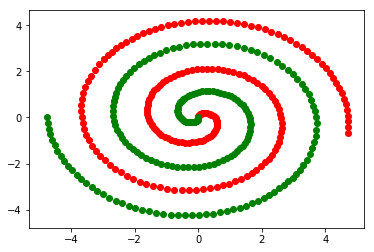

In [9]:
from scripts.visualizers import draw_scatter

draw_scatter(X, ys_labels)

In [10]:
from models.gauss_kernel_regressor import GaussKernelRegressor
model = GaussKernelRegressor(width=1.0, l2_regularization=0.01)
model.fit(X, ys_train)

100%|██████████| 400/400 [00:00<00:00, 18757.44it/s]


100%|██████████| 43780/43780 [00:01<00:00, 33243.40it/s]


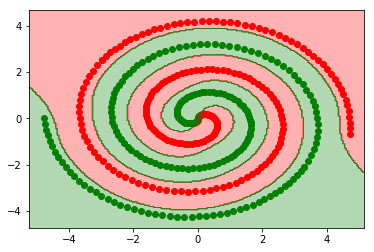

In [4]:
draw_scatter(X, ys_labels, model)

In [6]:
from models.linear_regressor import LinearRegressor
from models.modules.basis_functions import Cos, Sin
model = LinearRegressor(basis_functions=[Cos(1/i) for i in range(1, 10)] + [Sin(1/i) for i in range(1, 10)], l2_regularization=0.01)
model.fit(X, ys_train)

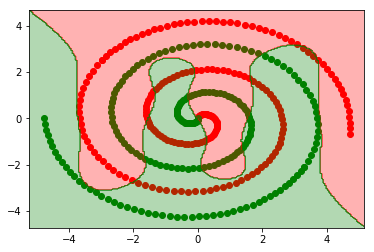

In [7]:
draw_scatter(X, ys_labels, model)